<a href="https://colab.research.google.com/github/DikshaNadiga123/ML-LAB/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import copy

In [ ]:
dataset = pd.read_csv('/content/Tennis.csv')
X = dataset.iloc[:,:].values
X

array([['Sunny', 'Hot', 'High', 'Weak', 'No'],
       ['Sunny', 'Hot', 'High', 'Strong', 'No'],
       ['Overcast', 'Hot', 'High', 'Weak', 'Yes'],
       ['Rain', 'Mild', 'High', 'Weak', 'Yes'],
       ['Rain', 'Cool', 'Normal', 'Weak', 'Yes'],
       ['Rain', 'Cool', 'Normal', 'Strong', 'No'],
       ['Overcast', 'Cool', 'Normal', 'Strong', 'Yes'],
       ['Sunny', 'Mild', 'High', 'Weak', 'No'],
       ['Sunny', 'Cool', 'Normal', 'Weak', 'Yes'],
       ['Rain', 'Mild', 'Normal', 'Weak', 'Yes'],
       ['Sunny', 'Mild', 'Normal', 'Strong', 'Yes'],
       ['Overcast', 'Mild', 'High', 'Strong', 'Yes'],
       ['Overcast', 'Hot', 'Normal', 'Weak', 'Yes'],
       ['Rain', 'Mild', 'High', 'Strong', 'No']], dtype=object)

In [ ]:
attribute = ['Outlook', 'Temp', 'Humidity', 'Wind']

In [ ]:
class Node(object):
    def __init__(self):
        self.value = None
        self.decision = None
        self.child = None

In [ ]:
def findEntropy(data, rows):
    yes=0
    no=0
    ans=-1
    idx=len(data[0])-1
    entropy=0

    for i in rows:
        if data[i][idx]=='Yes':
            yes=yes+1
        else:
            no=no+1

    x=yes/(yes+no)
    y=no/(yes+no)
    if x!=0 and y!=0:
        entropy= -1*(x*math.log2(x)+y*math.log2(y))
    if x==1:
        ans = 1
    if y==1:
        ans = 0
    return entropy, ans

In [ ]:
def findMaxGain(data, rows, columns):
    maxGain = 0
    retidx = -1
    entropy, ans = findEntropy(data, rows)
    if entropy == 0:
        """if ans == 1:
            print("Yes")
        else:
            print("No")"""
        return maxGain, retidx, ans
    for j in columns:
        mydict = {}
        idx = j
        for i in rows:
            key = data[i][idx]
            if key not in mydict:
                mydict[key] = 1
            else:
                mydict[key] = mydict[key] + 1
        gain = entropy

        # print(mydict)
        for key in mydict:
            yes = 0
            no = 0
            for k in rows:
                if data[k][j] == key:
                    if data[k][-1] == 'Yes':
                        yes = yes + 1
                    else:
                        no = no + 1
            # print(yes, no)
            x = yes/(yes+no)
            y = no/(yes+no)
            # print(x, y)
            if x != 0 and y != 0:
                gain += (mydict[key] * (x*math.log2(x) + y*math.log2(y)))/14
        # print(gain)
        if gain > maxGain:
            # print("hello")
            maxGain = gain
            retidx = j

    return maxGain, retidx, ans

In [ ]:
def buildTree(data, rows, columns):

    maxGain, idx, ans = findMaxGain(X, rows, columns)
    root = Node()
    root.childs = []
    # print(maxGain)

    if maxGain == 0:
        if ans == 1:
            root.value = 'Yes'
        else:
            root.value = 'No'
        return root

    root.value = attribute[idx]
    mydict = {}
    for i in rows:
        key = data[i][idx]
        if key not in mydict:
            mydict[key] = 1
        else:
            mydict[key] += 1

    newcolumns = copy.deepcopy(columns)
    newcolumns.remove(idx)
    for key in mydict:
        newrows = []
        for i in rows:
            if data[i][idx] == key:
                newrows.append(i)
        # print(newrows)
        temp = buildTree(data, newrows, newcolumns)
        temp.decision = key
        root.childs.append(temp)
    return root
def traverse(root):
    print(root.decision)
    print(root.value)

    n = len(root.childs)
    if n > 0:
        for i in range(0, n):
            traverse(root.childs[i])
def calculate():
    rows = [i for i in range(0, 14)]
    columns = [i for i in range(0, 4)]
    root = buildTree(X, rows, columns)
    root.decision = 'Start'
    traverse(root)
calculate()

Start
Outlook
Sunny
Humidity
High
No
Normal
Yes
Overcast
Yes
Rain
Wind
Weak
Yes
Strong
No


In [ ]:
import math
import pandas as pd
from operator import itemgetter
class DecisionTree:
    def __init__(self, df, target, positive, parent_val, parent):
        self.data = df
        self.target = target
        self.positive = positive
        self.parent_val = parent_val
        self.parent = parent
        self.childs = []
        self.decision = ''

    def _get_entropy(self, data):
        p = sum(data[self.target]==self.positive)
        n = data.shape[0] - p
        p_ratio = p/(p+n)
        n_ratio = 1 - p_ratio
        entropy_p = -p_ratio*math.log2(p_ratio) if p_ratio != 0 else 0
        entropy_n = - n_ratio*math.log2(n_ratio) if n_ratio !=0 else 0
        return entropy_p + entropy_n

    def _get_gain(self, feat):
        avg_info=0
        for val in self.data[feat].unique():
            avg_info+=self._get_entropy(self.data[self.data[feat] == val])*sum(self.data[feat]==val)/self.data.shape[0]
        return self._get_entropy(df) - avg_info

    def _get_splitter(self):
        self.splitter = max(self.gains, key = itemgetter(1))[0]

    def update_nodes(self):
        self.features = [col for col in self.data.columns if col != self.target]
        self.entropy = self._get_entropy(self.data)
        if self.entropy != 0:
            self.gains = [(feat, self._get_gain(feat)) for feat in self.features]
            self._get_splitter()
            residual_columns = [k for k in self.data.columns if k != self.splitter]
            for val in self.data[self.splitter].unique():
                df_tmp = self.data[self.data[self.splitter]==val][residual_columns]
                tmp_node = DecisionTree(df_tmp, self.target, self.positive, val, self.splitter)
                tmp_node.update_nodes()
                self.childs.append(tmp_node)


In [ ]:
def print_tree(n):
    for child in n.childs:
        if child:
            print(child.__dict__.get('parent', ''))
            print(child.__dict__.get('parent_val', ''), '\n')
            print_tree(child)

In [ ]:
df = pd.read_csv('/content/Tennis.csv')
df

,Outlook,Temp,Humidity,Wind,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [ ]:
dt = DecisionTree(df, 'Play', 'Yes', '', '')
dt.update_nodes()
print_tree(dt)

Outlook
Sunny 

Humidity
High 

Humidity
Normal 

Outlook
Overcast 

Outlook
Rain 

Wind
Weak 

Wind
Strong 



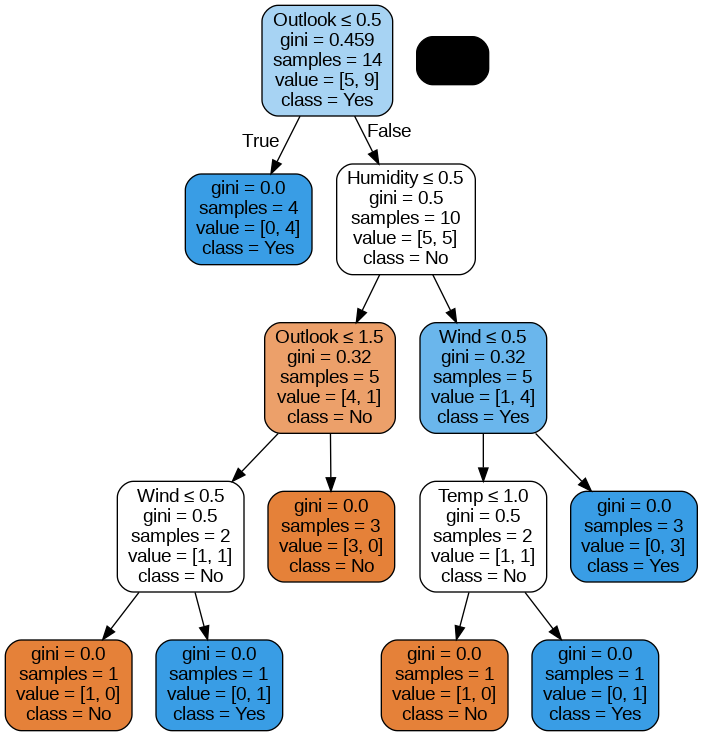

In [ ]:
# prompt: draw a decision tree for /content/Tennis.csv as path

import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from IPython.display import Image

# Load the dataset
df = pd.read_csv('/content/Tennis.csv')

# Encode categorical features to numerical values
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

# Separate features (X) and target (y)
X = df.drop('Play', axis=1)
y = df['Play']

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)

# Generate the decision tree visualization
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=X.columns,
                                class_names=['No', 'Yes'],
                                filled=True, rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)

# Save the tree as a PNG image
graph.write_png('tennis_decision_tree.png')

# Display the decision tree diagram
Image(graph.create_png())


In [ ]:
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Tennis.csv')

# Encode categorical features to numerical values
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

# Separate features (X) and target (y)
X = df.drop('Play', axis=1)
y = df['Play']

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)

# Generate the decision tree visualization in DOT format
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=X.columns,
                                class_names=['No', 'Yes'],
                                filled=True, rounded=True,
                                special_characters=True)

# Print the DOT format decision tree
print(dot_data)


digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label=<Outlook &le; 0.5<br/>gini = 0.459<br/>samples = 14<br/>value = [5, 9]<br/>class = Yes>, fillcolor="#a7d3f3"] ;
1 [label=<gini = 0.0<br/>samples = 4<br/>value = [0, 4]<br/>class = Yes>, fillcolor="#399de5"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<Humidity &le; 0.5<br/>gini = 0.5<br/>samples = 10<br/>value = [5, 5]<br/>class = No>, fillcolor="#ffffff"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label=<Outlook &le; 1.5<br/>gini = 0.32<br/>samples = 5<br/>value = [4, 1]<br/>class = No>, fillcolor="#eca06a"] ;
2 -> 3 ;
4 [label=<Wind &le; 0.5<br/>gini = 0.5<br/>samples = 2<br/>value = [1, 1]<br/>class = No>, fillcolor="#ffffff"] ;
3 -> 4 ;
5 [label=<gini = 0.0<br/>samples = 1<br/>value = [1, 0]<br/>class = No>, fillcolor="#e58139"] ;
4 -> 5 ;
6 [label=<gini = 0.0<br/>samples = 1<br/>value = [0, 1]<